# Kfold
Da erkannt wurde, dass der Train Test Split nach dem 80 20 Prinzip viel zu gute Resultate produziert, die in der realität nicht hilfreich sind wurde entschieden Kfols für den Split einzusetzen. KFold liefert Train/Test-Indizes, um die Daten in Train- und Test-Sets aufzuteilen. Es teilt den Datensatz in k aufeinanderfolgende Folds auf. Die Folds waren in unserem Fall die 10 Monate des Datensatzes. Das heisst es gab 10 Iterrationen und immer ein anderer Monat wurde für das Testing verwendet.

In [138]:
# Pandas Numby wird importiert
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Random Forest wird importiert
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=9)

Anhand des unteren Plots sieht man gut das die Vermutung aus dem Notebook 2a sich bestätigen. Die Parkhäuser haben eine Wellenmässige regelmässigkeit.

<AxesSubplot:xlabel='month,day_of_month'>

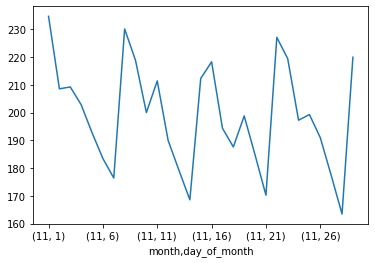

In [181]:
df = pd.read_pickle("./data.pkl")
data = df[df['parking_id'] == 'opera']
mask = (df['date'] > '2020-11-01') & (df['date'] <= '2020-11-30')
data = data.loc[mask]
data.groupby(['month', 'day_of_month'])['free_parking_0'].mean().plot()

In [39]:
df = pd.read_pickle("./data.pkl")
mask = (df['date'] > '2020-06-01') & (df['date'] <= '2020-10-31')
df_train = df.loc[mask]
mask = (df['date'] > '2020-11-01') & (df['date'] <= '2021-03-30')
df_test = df.loc[mask]

In [29]:
df['month'].unique()

array([ 4,  3, 12, 10,  9,  7,  1, 11,  8,  2])

In [148]:
from sklearn.model_selection import GroupKFold

def data_kfold_train(df, parkingid, n_splits = 10):
    data = df[df['parking_id'] == parkingid]
    X = data[['day_of_week', 'is_weekend', 'hour']]
    y = data['free_parking_0']
    groups = data['month']
    
    scores = []
    for train_index, test_index in group_kfold.split(X, y, groups):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        forest = RandomForestRegressor(n_estimators=9)
        forest.fit(X_train, y_train)
        score = forest.score(X_test, y_test)
        
        # Ausgabe
        #print(score)
        first_tree = forest.estimators_[0]
        feat_imp = pd.Series(forest.feature_importances_, index=X.columns)
        #print(feat_imp.sort_values(ascending=False))
        scores.append(score)
    return np.array(scores)

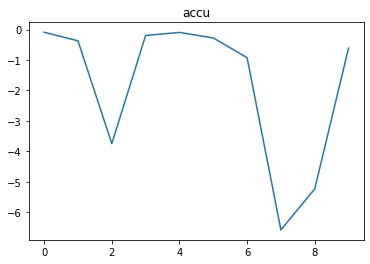

Best Score -0.08824762837997424


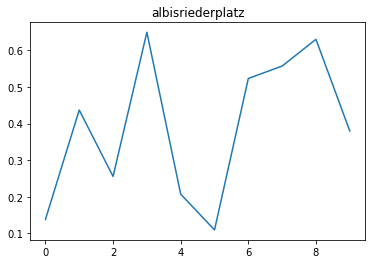

Best Score 0.6496519318359852


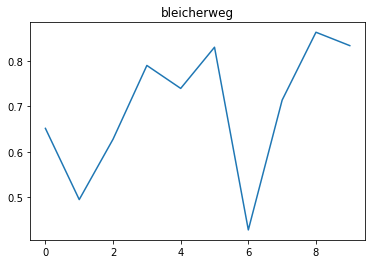

Best Score 0.8632153420502586


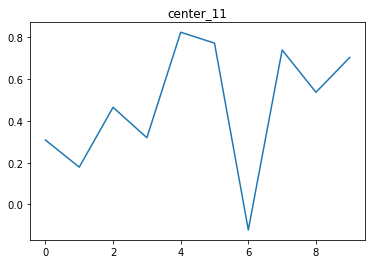

Best Score 0.8244035297292437


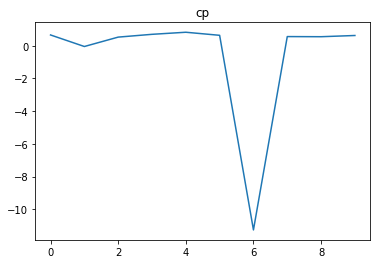

Best Score 0.8215716882553857


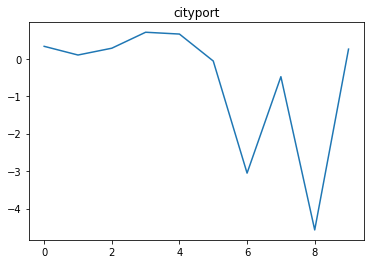

Best Score 0.7058642123790169


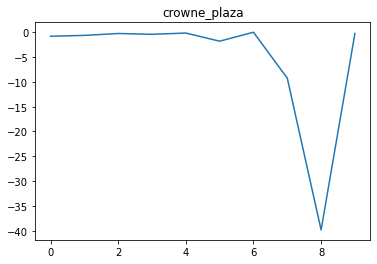

Best Score 0.012220768521168712


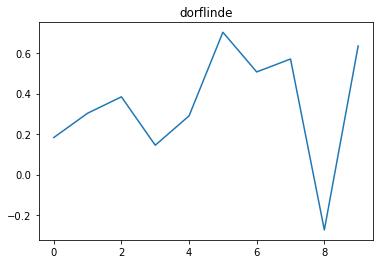

Best Score 0.7032648171007014


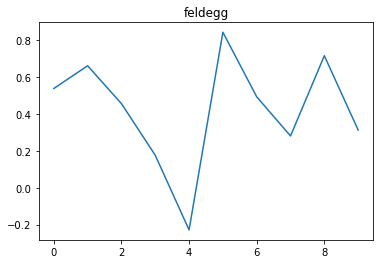

Best Score 0.8420168156738043


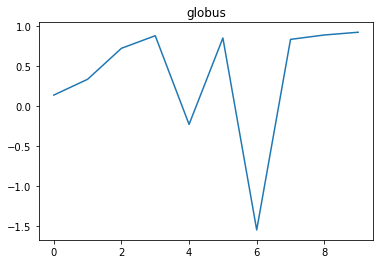

Best Score 0.9191678608530855


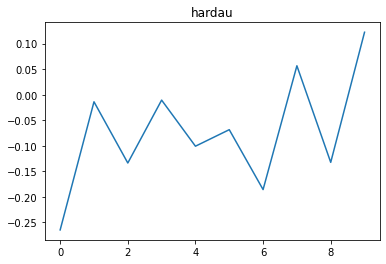

Best Score 0.12227151177125817


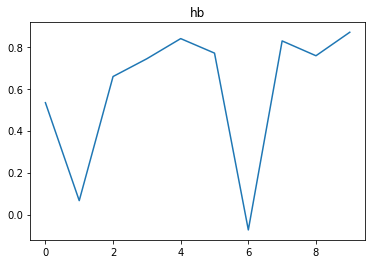

Best Score 0.86930643092444


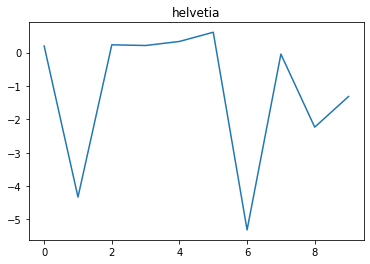

Best Score 0.6112490889161519


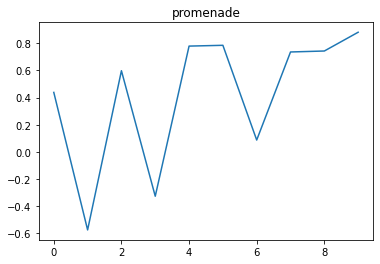

Best Score 0.8811060389413545


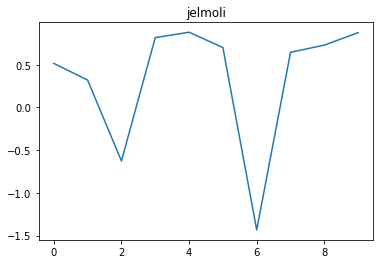

Best Score 0.8799853591208533


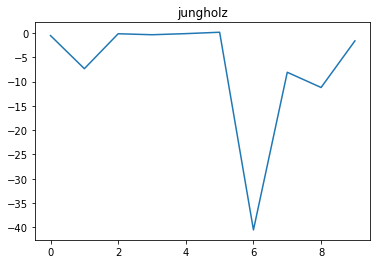

Best Score 0.1817082104223149


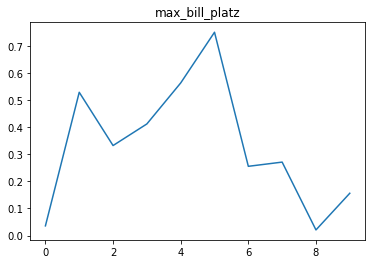

Best Score 0.7527398151927718


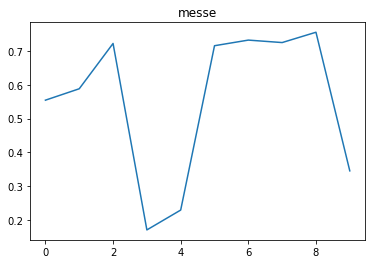

Best Score 0.7550160159774724


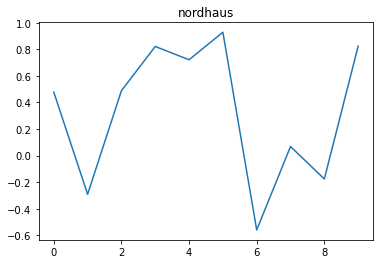

Best Score 0.9283942141148868


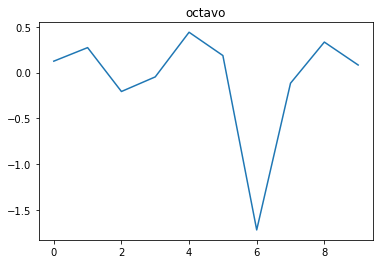

Best Score 0.44145148124351163


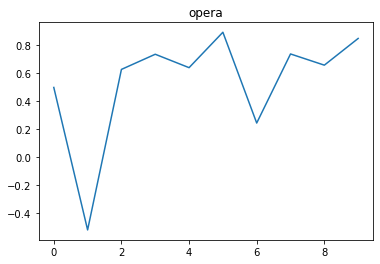

Best Score 0.8943053422634195


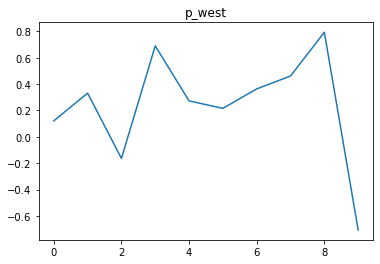

Best Score 0.7929621509070035


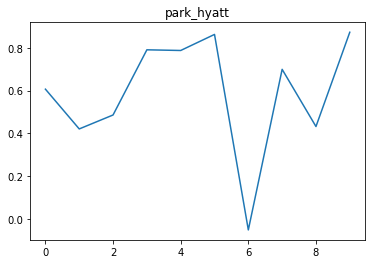

Best Score 0.8728210102721277


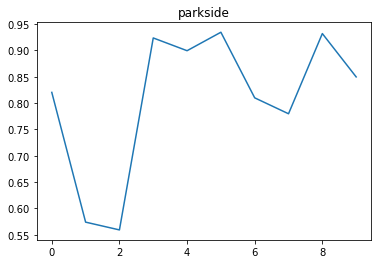

Best Score 0.9346036105789923


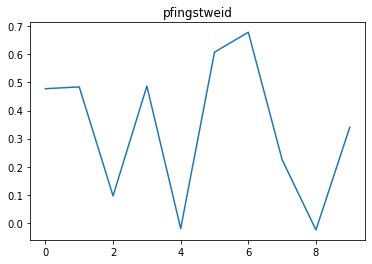

Best Score 0.678973450012703


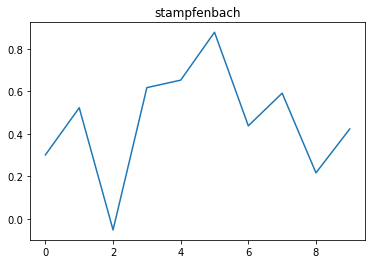

Best Score 0.8781854500938424


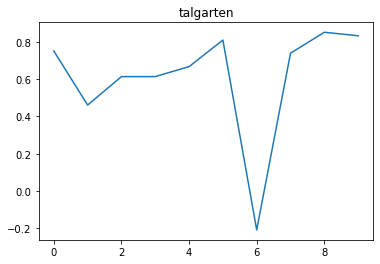

Best Score 0.8512786577930189


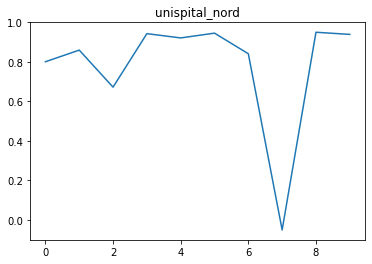

Best Score 0.9500291228000513


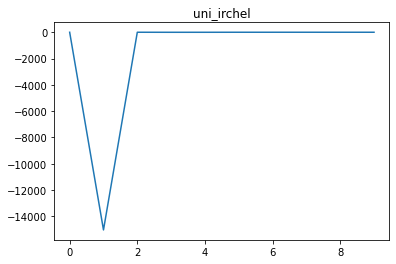

Best Score 0.15471022725878147


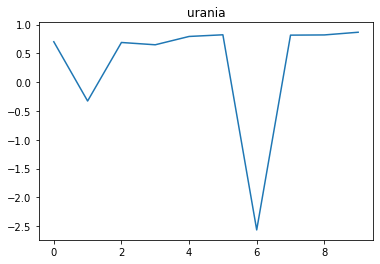

Best Score 0.8658931226398991


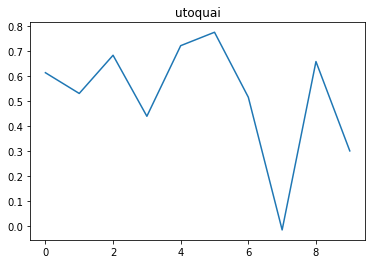

Best Score 0.7763359571381369


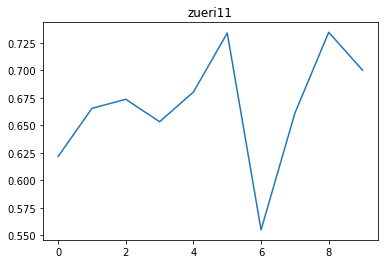

Best Score 0.7347103018942713


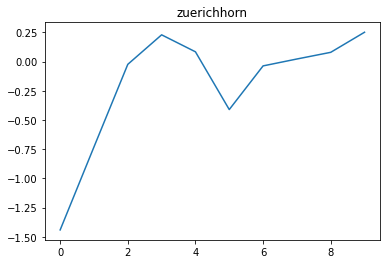

Best Score 0.25097597630301116


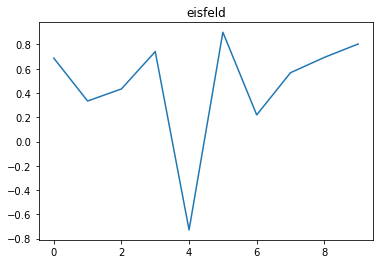

Best Score 0.900934285559292


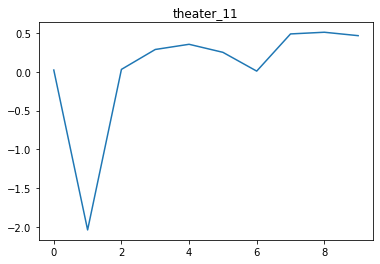

Best Score 0.5091082548898267


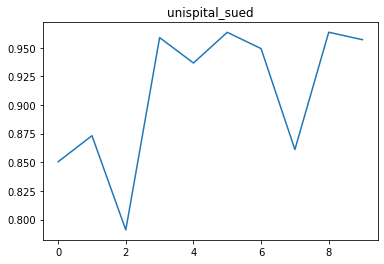

Best Score 0.963486109594937


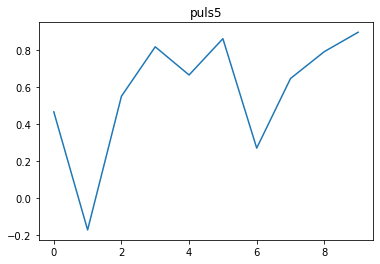

Best Score 0.8947430069276004


ValueError: Cannot have number of splits n_splits=10 greater than the number of groups: 9.

In [150]:
# Alle Parkings werden durch die Schleife berechnet
for parkingid in df['parking_id'].unique():
    results = data_kfold_train(df, parkingid)
    plt.plot(results)
    plt.title(parkingid)
    plt.show()
    print("Best Score " + str(results.max()))

# Ergebnis
Das Projektteam ist mit den erzielten Ergebnissen sehr zufrieden. Ein eigener Datensatz auszuwerten war zu Beginn etwas schwierig, weil andere Versuche auf den eigenen Versuch angewendet werden mussten.

Die Vorhersagen im Testdruchlauf sind vielversprechend. Teilweise konnte eine Genauigkeit von 80% erreicht werden. Bei gewissen Parkings ist die Vorhersage allerdings extrem schwierig, wie zum Beispiel beim Uni Irchel Parking, wo die Geanuigkeit nur bei 40% liegt. Erklärungsversuche wurden im Jupyter Notebook 1b-analyse bereits beschrieben. Zudem hat die Corona-Pandemie in den Parkhäusern zu "unnatürlichen" Zykeln geführt. Nichtsdestotrotz hat es unglaublich Spass gemacht an einem Problem zu grübeln und Schritt für Schritt die Daten besser zu verstehen. Das Team hat gelernt, dass es unglaublich wichtig ist die Daten zu verstehen und diese gut aufzubereiten. Denn wenn die Daten nicht verstanden und aufbereitet werden, kann das Modell auch nicht zaubern und eine gute Performance liefern. Zudem ist es wichtig, dass man sich nicht zu schnell von guten Resultaten blenden lässt und diese immer hinterfrägt. 